In [110]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, hierarchical 
from sklearn.mixture import GaussianMixture
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.datasets import load_concrete
from yellowbrick.features.pca import PCADecomposition
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore")
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn import cluster, datasets

# Importing and working on Database

In [40]:
absent = pd.read_csv('C:/Users/joaos/Desktop/Curso Ironhack/Labs/data-labs/module-3/unsupervised-learning-project/your-code/absenteeism.csv', sep=';')
absent.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [41]:
absent.shape

(740, 21)

In [42]:
absent.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [43]:
absent = absent.drop(['ID', 'Hit target', 'Weight', 'Height'], axis=1)

In [44]:
absent.dtypes

Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

# Scalling

In [72]:


scaler = StandardScaler()

absent_transformed = pd.DataFrame(scaler.fit_transform(absent), columns=absent.columns)


In [46]:
absent_transformed.describe()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours
count,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02
mean,-2.100422e-16,-9.067822e-16,8.881784e-17,2.302963e-16,6.601326e-17,-5.911187e-17,-3.660735e-17,-4.626929e-16,1.750245e-15,-4.485151e-16,1.378027e-15,8.137822e-16,7.981603e-16,-7.006407e-17,-3.301038e-16,-1.215244e-16,9.751959e-17
std,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00
min,-2.280124e+00,-1.841698e+00,-1.347819e+00,-1.390175e+00,-1.544379e+00,-1.661258e+00,-2.636762e+00,-1.459596e+00,-1.679999e+00,-2.390457e-01,-4.338574e-01,-9.281914e-01,-1.145644e+00,-2.805659e-01,-5.662399e-01,-1.792627e+00,-5.197666e-01
25%,-7.375929e-01,-9.680719e-01,-6.439473e-01,-4.901490e-01,-6.326655e-01,-9.193567e-01,-8.110742e-01,-8.417777e-01,-6.943900e-01,-2.390457e-01,-4.338574e-01,-9.281914e-01,-1.145644e+00,-2.805659e-01,-5.662399e-01,-6.251003e-01,-3.696389e-01
50%,4.489696e-01,-9.444604e-02,5.992420e-02,4.098765e-01,5.485632e-02,-2.449005e-01,1.017698e-01,8.495004e-02,-1.855218e-01,-2.390457e-01,-4.338574e-01,-1.723432e-02,8.728716e-01,-2.805659e-01,-5.662399e-01,-3.915949e-01,-2.945750e-01
75%,8.049384e-01,7.791798e-01,7.637957e-01,1.309902e+00,5.779707e-01,1.373794e+00,7.864028e-01,5.483139e-01,5.822640e-01,-2.390457e-01,-4.338574e-01,8.937228e-01,8.728716e-01,-2.805659e-01,1.928498e-01,1.009438e+00,8.074438e-02
max,1.042251e+00,1.652806e+00,1.467667e+00,1.309902e+00,2.491075e+00,1.508686e+00,3.753146e+00,3.328497e+00,2.751449e+00,4.183300e+00,4.025233e+00,2.715637e+00,8.728716e-01,3.564226e+00,5.506478e+00,2.643976e+00,8.487898e+00


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 <a list of 17 Text xticklabel objects>)

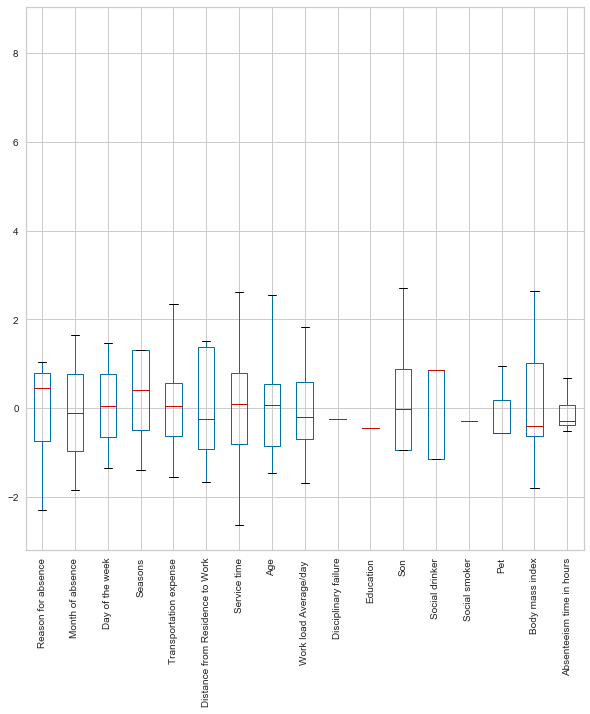

In [89]:
plt.figure(figsize=(10,10))

absent_transformed.boxplot()
plt.xticks(rotation=90)

# Kmeans

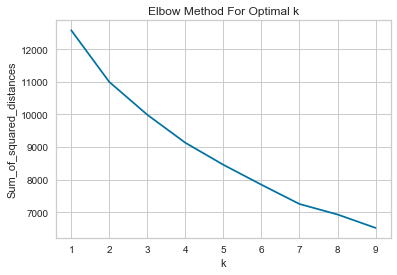

In [76]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(absent_transformed)
    Sum_of_squared_distances.append(km.inertia_)


plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

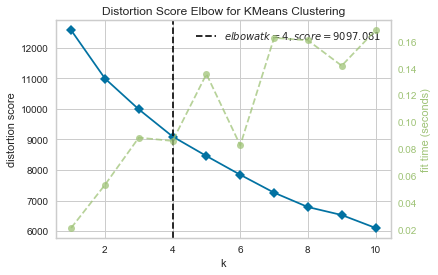

In [77]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(KMeans(), k=(1,11))

visualizer.fit(absent_transformed)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [78]:
kmeans = KMeans(n_clusters=4)

In [79]:
kmeans_absent = kmeans.fit_predict(absent_transformed)
kmeans_absent.shape

(740,)

In [80]:
from sklearn.decomposition import PCA

In [81]:
pca = PCA(n_components=2)

In [82]:
dfpca = pca.fit_transform(absent_transformed)

In [83]:
sorted(list(zip(pca.components_[1], absent.columns)), key=lambda x : x[0], reverse=True )

[(0.4892565524213121, 'Transportation expense'),
 (0.3881275131924496, 'Distance from Residence to Work'),
 (0.37838963336890036, 'Son'),
 (0.3652316154135469, 'Social drinker'),
 (0.31933273953929625, 'Pet'),
 (0.20943415857508993, 'Month of absence'),
 (0.17549939042173268, 'Disciplinary failure'),
 (0.11181904168840465, 'Seasons'),
 (0.06435398796297247, 'Body mass index'),
 (0.05502987947604488, 'Day of the week'),
 (0.0332878793863883, 'Absenteeism time in hours'),
 (0.023436759604740093, 'Social smoker'),
 (0.0002992371813294557, 'Work load Average/day '),
 (-0.06114862233401546, 'Age'),
 (-0.09145133592789759, 'Service time'),
 (-0.1069756379260201, 'Reason for absence'),
 (-0.3345132985538267, 'Education')]

In [84]:
sorted(list(zip(pca.components_[0], absent.columns)), key=lambda x : x[0], reverse=True )

[(0.2911520489493258, 'Education'),
 (0.26759091336206153, 'Pet'),
 (0.21673690260139317, 'Transportation expense'),
 (0.05532869358969841, 'Social smoker'),
 (0.039863376015434215, 'Work load Average/day '),
 (0.03706418340384536, 'Seasons'),
 (0.03296316326445358, 'Son'),
 (0.015383921135546218, 'Month of absence'),
 (0.013723262751582805, 'Day of the week'),
 (-0.016694201352514374, 'Disciplinary failure'),
 (-0.017086374952289308, 'Absenteeism time in hours'),
 (-0.06019100159720001, 'Reason for absence'),
 (-0.10505160100437072, 'Distance from Residence to Work'),
 (-0.3406988656680899, 'Social drinker'),
 (-0.43881313519161114, 'Body mass index'),
 (-0.44379733155446716, 'Age'),
 (-0.5179737834679865, 'Service time')]

In [85]:
dfpca = pd.DataFrame(dfpca, columns=['pc1','pc2'])
dfpca.head()

,pc1,pc2
0,-0.471638,1.307331
1,-2.836949,-0.286238
2,-2.199857,-0.100271
3,-0.034493,0.420539
4,-0.428373,1.418087


In [86]:
dfpca['kmeans_absent']=kmeans_absent

In [87]:
dfpca.kmeans_absent.value_counts()

1    266
2    256
3    178
0     40
Name: kmeans_absent, dtype: int64

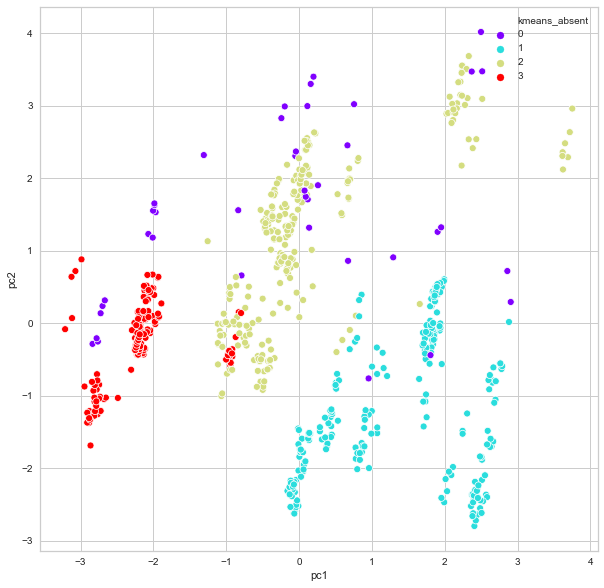

In [88]:
plt.figure(figsize=(10,10))

sns.scatterplot(dfpca.pc1,dfpca.pc2, hue=dfpca.kmeans_absent, palette='rainbow', legend='full')

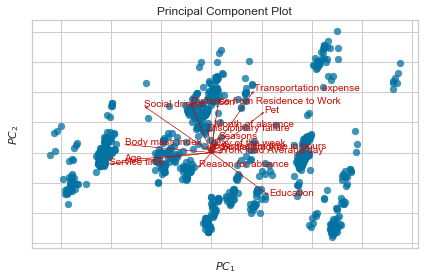

In [90]:
X, y = load_concrete()

visualizer = PCADecomposition(scale=True, proj_features=True, proj_dim=2)
visualizer.fit_transform(absent_transformed)
visualizer.show()

# Agg

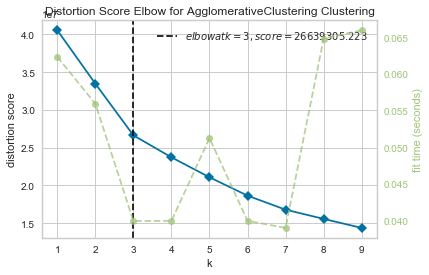

In [122]:
single = cluster.AgglomerativeClustering(n_clusters=4, linkage='single')
single.fit(absent_transformed)
y1_pred = single.labels_.astype(np.int)

model1 = AgglomerativeClustering()
visualizer = KElbowVisualizer(model1, k=(1,10))
visualizer.fit(X)
visualizer.poof()

In [127]:
dendro = hierarchical.AgglomerativeClustering(n_clusters=4)
clasdendro = dendro.fit_predict(absent_transformed)

In [128]:
dfpca['clasdendro']= clasdendro

In [129]:
dfpca.clasdendro.value_counts()

1    240
2    235
3    180
0     85
Name: clasdendro, dtype: int64

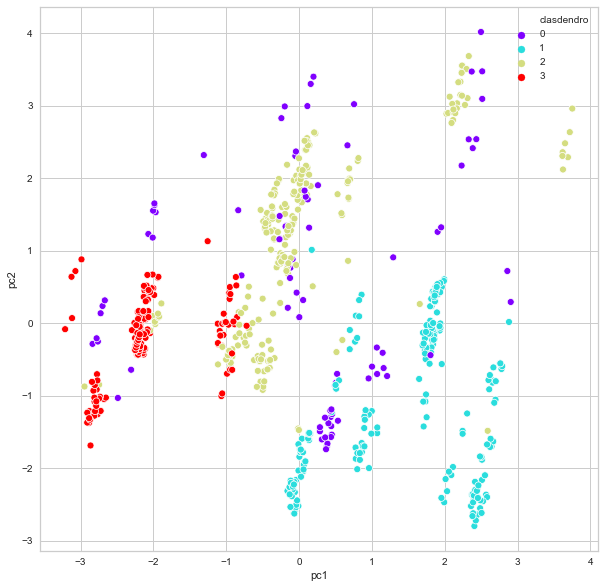

In [130]:
plt.figure(figsize=(10,10))
sns.scatterplot(dfpca.pc1,dfpca.pc2, hue=dfpca.clasdendro, palette='rainbow', legend='full')

# TSNE

In [138]:
from sklearn.manifold import TSNE

In [139]:
tsne = TSNE(perplexity=25,)
dftsne = pd.DataFrame(tsne.fit_transform(absent_transformed), columns=['pc1', 'pc2'])

In [140]:
dftsne['kmeans_absent']=kmeans_absent


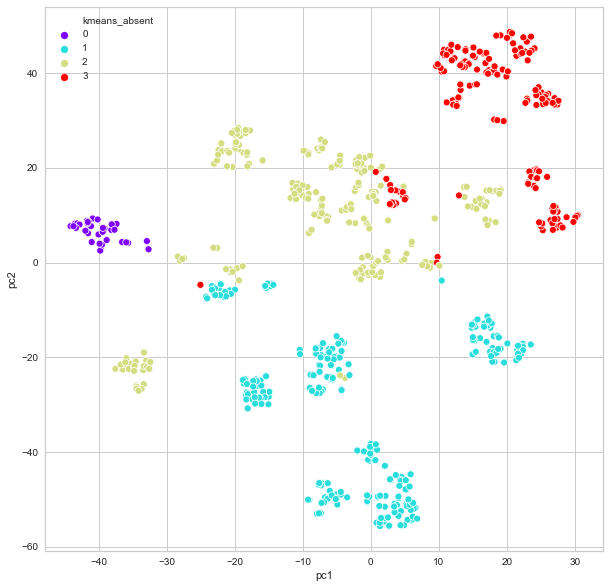

In [141]:
plt.figure(figsize=(10,10))

sns.scatterplot(dftsne.pc1,dftsne.pc2, hue=dftsne.kmeans_absent, palette='rainbow')